<a href="https://colab.research.google.com/github/AdithyaRIyer/Image-Processing/blob/main/Adding%26Removing_Gausian_Salt%26Pepper_Noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Addig Gausian Noise and removig it 

In [1]:
from google.colab import files
from IPython.display import Image

In [2]:
uploaded = files.upload()

Saving lena_gray.png to lena_gray.png


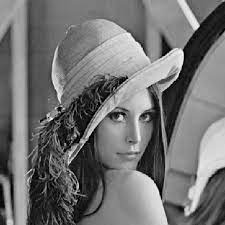

In [3]:
Image('lena_gray.png')

In [8]:
import cv2

for filename, contents in uploaded.items() :
    with open(filename, 'wb') as f :
          f.write(contents)

print(filename)
img = cv2.imread(filename, 0)
print(img)
print(img.shape)

lena_gray.png
[[156 155 155 ... 148 175 142]
 [155 155 155 ... 139 138  92]
 [155 155 154 ...  58  26  20]
 ...
 [ 34  33  27 ...  57  73  74]
 [ 38  36  27 ...  74  95  84]
 [ 29  32  23 ...  83  86  93]]
(225, 225)


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [11]:
gauss_noise=np.zeros((640,480),dtype=np.uint8)
cv2.randn(gauss_noise,128,20)
gauss_noise=(gauss_noise*0.5).astype(np.uint8)
gauss_noise_resized = cv2.resize(gauss_noise, (img.shape[1], img.shape[0]))

In [13]:
gn_img=cv2.add(img,gauss_noise_resized, dtype=cv2.CV_64F)

Text(0.5, 1.0, 'Combined')

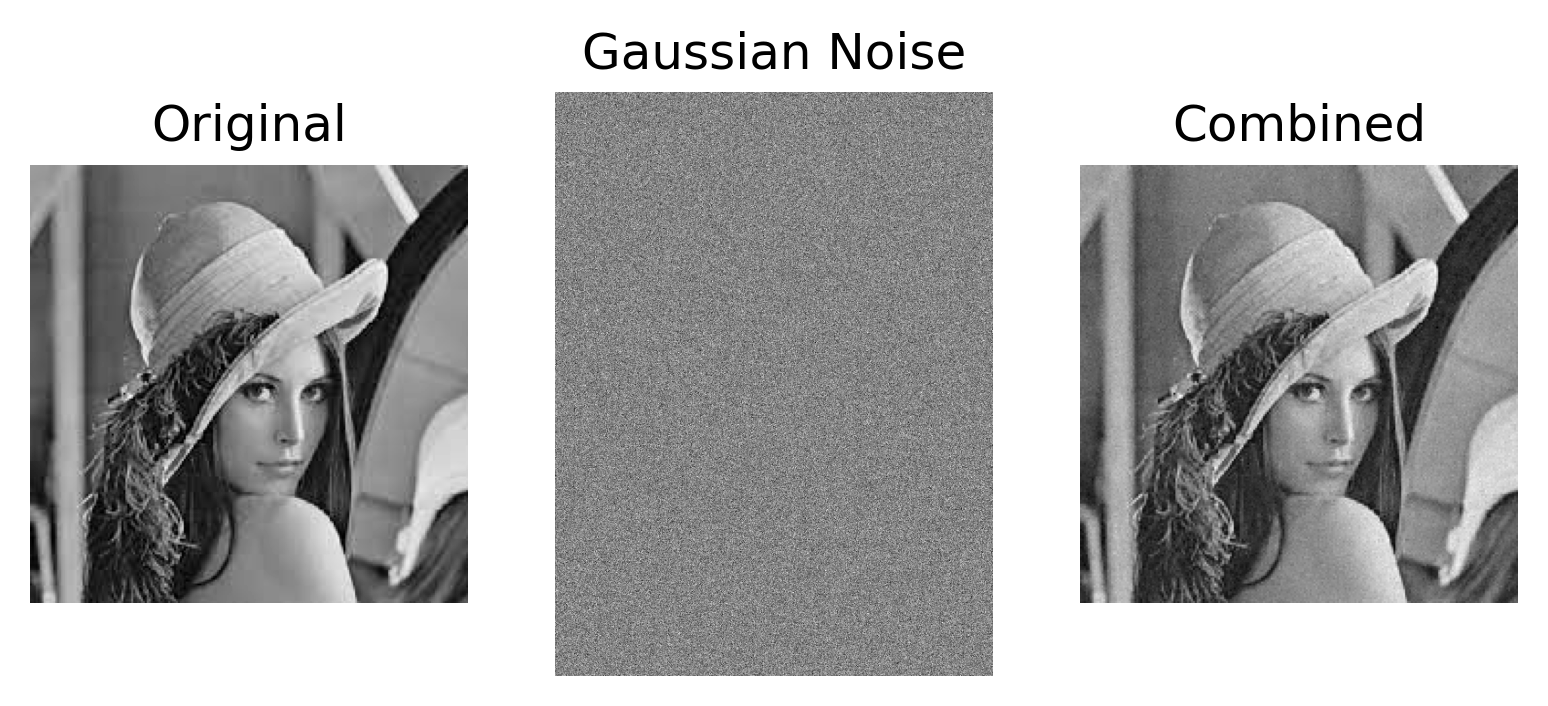

In [14]:
fig=plt.figure(dpi=300)

fig.add_subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(gauss_noise,cmap='gray')
plt.axis("off")
plt.title("Gaussian Noise")

fig.add_subplot(1,3,3)
plt.imshow(gn_img,cmap='gray')
plt.axis("off")
plt.title("Combined")

Text(0.5, 1.0, 'After Denoising')

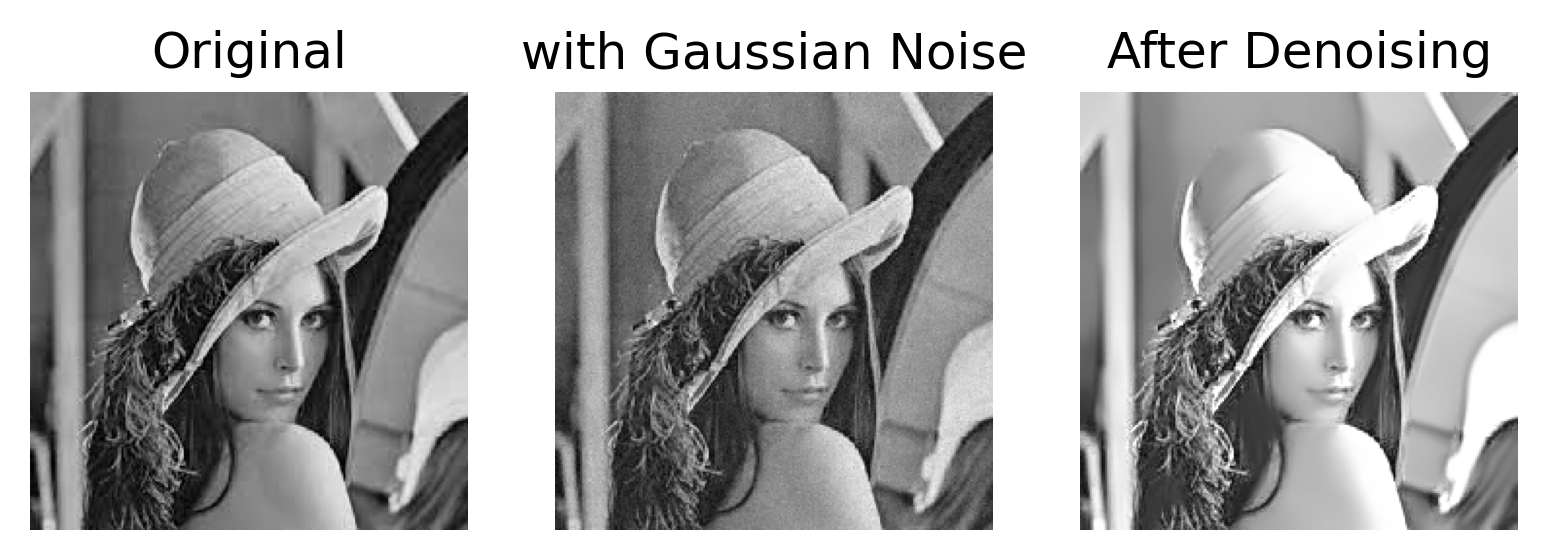

In [16]:
## Noise Removal

gn_img_8u = cv2.convertScaleAbs(gn_img)

denoised1 = cv2.fastNlMeansDenoising(gn_img_8u, None, 10, 10)

# fig = plt.figure(dpi=300)


# denoised1= cv2.fastNlMeansDenoising(gn_img,None,10,10)

fig=plt.figure(dpi=300)
fig.add_subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(gn_img,cmap='gray')
plt.axis("off")
plt.title("with Gaussian Noise")

fig.add_subplot(1,3,3)
plt.imshow(denoised1,cmap='gray')
plt.axis("off")
plt.title("After Denoising")

In [17]:
##ADDING AND REMOVING SALT AND PEPPER NOISE

In [21]:
import numpy as np
import cv2

# Load the image
img = cv2.imread(filename)

# Add salt and pepper noise
noise = np.zeros(img.shape, np.uint8)
p = 0.05  # Probability of a pixel being set to white or black
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        r = np.random.random()
        if r < p/2:
            noise[i,j] = [0,0,0]  # Black pixel
        elif r < p:
            noise[i,j] = np.array([255,255,255], dtype=np.uint8)  # White pixel

noisy_img = cv2.add(img, noise)  # Add the noise to the original image
cv2.imwrite('noisy_image.jpg', noisy_img)  # Save the noisy image



True

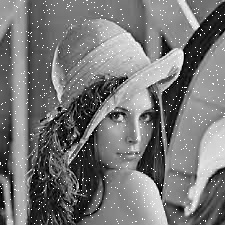

In [22]:
Image('noisy_image.jpg')

In [23]:
# Load the noisy image
noisy_img = cv2.imread('noisy_image.jpg')

# Apply median filtering to remove salt and pepper noise
denoised_img = cv2.medianBlur(noisy_img, 5)  # Kernel size of 5x5

# Save the denoised image
cv2.imwrite('denoised_image.jpg', denoised_img)

True

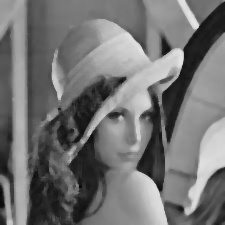

In [24]:
Image('denoised_image.jpg')